<a href="https://colab.research.google.com/github/FathimaNazarudeen/lung-cancer/blob/main/2nd%20dataset%20lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

In [ ]:
data=pd.read_csv("/content/thirddatasetdata2editednew.csv")

In [ ]:
data

,imaging.radiomics.GLCM_autocorr,imaging.radiomics.GLCM_clusProm,imaging.radiomics.GLCM_clusShade,imaging.radiomics.GLCM_clusTend,imaging.radiomics.GLCM_contrast,imaging.radiomics.GLCM_correl1,imaging.radiomics.GLCM_diffEntro,imaging.radiomics.GLCM_dissimilar,imaging.radiomics.GLCM_energy,imaging.radiomics.GLCM_entrop2,...,imaging.radiomics.Wavelet_LLL_stats_median,imaging.radiomics.Wavelet_LLL_stats_min,imaging.radiomics.Wavelet_LLL_stats_range,imaging.radiomics.Wavelet_LLL_stats_rms,imaging.radiomics.Wavelet_LLL_stats_skewness,imaging.radiomics.Wavelet_LLL_stats_std,imaging.radiomics.Wavelet_LLL_stats_totalenergy,imaging.radiomics.Wavelet_LLL_stats_uniformity,imaging.radiomics.Wavelet_LLL_stats_var,label
0,974.807775,1.622693e+04,-485.694214,20.677451,2.199042,0.821098,1.080075,0.734860,0.161738,2.561361,...,2908.156236,749.562721,2737.841292,2866.720944,-4.684032,202.090410,4.920334e+08,0.341563,4.084053e+04,squamous
1,1481.384832,5.990974e+04,-1576.604188,65.516719,9.254695,0.754425,1.686171,1.722073,0.047312,4.066880,...,2895.820234,77.734493,3450.898825,2808.211801,-2.685867,327.154770,6.100099e+08,0.193098,1.070302e+05,squamous
2,3872.453374,4.108418e+09,-40980.455560,1374.305720,29.367922,0.960624,2.416309,3.878045,0.003364,6.389297,...,5252.020964,768.520760,5846.377098,4919.140829,-0.778334,1349.678920,2.104979e+08,0.026267,1.821633e+09,squamous
3,695.041214,4.149945e+04,-1315.773459,87.294884,10.902911,0.775198,1.851825,2.009553,0.034897,4.583572,...,5886.237720,4035.371922,2586.389219,5725.580599,-1.472562,397.225995,9.263943e+08,0.120999,1.577885e+05,squamous
4,762.350839,6.832887e+04,-1381.277499,148.188061,22.457054,0.736728,2.297417,3.411370,0.005689,5.767177,...,2577.676304,728.016080,2955.870207,2540.403805,-0.571742,474.197815,3.166161e+07,0.045411,2.248636e+05,squamous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1136.874226,1.726526e+04,-508.990915,40.848166,12.219760,0.537969,2.017602,2.541419,0.012917,4.897015,...,2947.395894,899.333940,2488.809180,2872.653468,-1.943993,278.641225,1.155299e+08,0.099577,7.764093e+04,other
85,690.874197,4.733321e+04,-1432.032909,107.520123,12.172218,0.792865,1.992276,2.357484,0.019799,4.922992,...,5844.429702,3969.695656,2325.999258,5696.150168,-1.123228,432.854997,2.281936e+08,0.077416,1.873634e+05,other
86,601.924490,6.179012e+03,-210.953607,20.484082,2.231344,0.800474,1.212351,0.864871,0.093544,3.260115,...,2982.771351,1308.938860,2335.651107,2959.605055,-2.456362,187.578235,1.643343e+09,0.253570,3.518559e+04,other
87,601.924490,6.179012e+03,-210.953607,20.484082,2.231344,0.800474,1.212351,0.864871,0.093544,3.260115,...,2982.771351,1308.938860,2335.651107,2959.605055,-2.456362,187.578235,1.643343e+09,0.253570,3.518559e+04,other


In [ ]:
data['label'].value_counts()

adeno       42
squamous    35
other       12
Name: label, dtype: int64

In [ ]:
data.columns 

Index(['imaging.radiomics.GLCM_autocorr', 'imaging.radiomics.GLCM_clusProm',
       'imaging.radiomics.GLCM_clusShade', 'imaging.radiomics.GLCM_clusTend',
       'imaging.radiomics.GLCM_contrast', 'imaging.radiomics.GLCM_correl1',
       'imaging.radiomics.GLCM_diffEntro', 'imaging.radiomics.GLCM_dissimilar',
       'imaging.radiomics.GLCM_energy', 'imaging.radiomics.GLCM_entrop2',
       ...
       'imaging.radiomics.Wavelet_LLL_stats_median',
       'imaging.radiomics.Wavelet_LLL_stats_min',
       'imaging.radiomics.Wavelet_LLL_stats_range',
       'imaging.radiomics.Wavelet_LLL_stats_rms',
       'imaging.radiomics.Wavelet_LLL_stats_skewness',
       'imaging.radiomics.Wavelet_LLL_stats_std',
       'imaging.radiomics.Wavelet_LLL_stats_totalenergy',
       'imaging.radiomics.Wavelet_LLL_stats_uniformity',
       'imaging.radiomics.Wavelet_LLL_stats_var', 'label'],
      dtype='object', length=651)

In [ ]:
data_real = data.replace(np.inf, np.nan)

In [ ]:
data_real.isnull().sum().sum()

0

In [ ]:
data_df = data_real.dropna(axis=0)

In [ ]:
data_df.isnull().sum().sum()

0

In [ ]:
data_df

,imaging.radiomics.GLCM_autocorr,imaging.radiomics.GLCM_clusProm,imaging.radiomics.GLCM_clusShade,imaging.radiomics.GLCM_clusTend,imaging.radiomics.GLCM_contrast,imaging.radiomics.GLCM_correl1,imaging.radiomics.GLCM_diffEntro,imaging.radiomics.GLCM_dissimilar,imaging.radiomics.GLCM_energy,imaging.radiomics.GLCM_entrop2,...,imaging.radiomics.Wavelet_LLL_stats_median,imaging.radiomics.Wavelet_LLL_stats_min,imaging.radiomics.Wavelet_LLL_stats_range,imaging.radiomics.Wavelet_LLL_stats_rms,imaging.radiomics.Wavelet_LLL_stats_skewness,imaging.radiomics.Wavelet_LLL_stats_std,imaging.radiomics.Wavelet_LLL_stats_totalenergy,imaging.radiomics.Wavelet_LLL_stats_uniformity,imaging.radiomics.Wavelet_LLL_stats_var,label
0,974.807775,1.622693e+04,-485.694214,20.677451,2.199042,0.821098,1.080075,0.734860,0.161738,2.561361,...,2908.156236,749.562721,2737.841292,2866.720944,-4.684032,202.090410,4.920334e+08,0.341563,4.084053e+04,squamous
1,1481.384832,5.990974e+04,-1576.604188,65.516719,9.254695,0.754425,1.686171,1.722073,0.047312,4.066880,...,2895.820234,77.734493,3450.898825,2808.211801,-2.685867,327.154770,6.100099e+08,0.193098,1.070302e+05,squamous
2,3872.453374,4.108418e+09,-40980.455560,1374.305720,29.367922,0.960624,2.416309,3.878045,0.003364,6.389297,...,5252.020964,768.520760,5846.377098,4919.140829,-0.778334,1349.678920,2.104979e+08,0.026267,1.821633e+09,squamous
3,695.041214,4.149945e+04,-1315.773459,87.294884,10.902911,0.775198,1.851825,2.009553,0.034897,4.583572,...,5886.237720,4035.371922,2586.389219,5725.580599,-1.472562,397.225995,9.263943e+08,0.120999,1.577885e+05,squamous
4,762.350839,6.832887e+04,-1381.277499,148.188061,22.457054,0.736728,2.297417,3.411370,0.005689,5.767177,...,2577.676304,728.016080,2955.870207,2540.403805,-0.571742,474.197815,3.166161e+07,0.045411,2.248636e+05,squamous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1136.874226,1.726526e+04,-508.990915,40.848166,12.219760,0.537969,2.017602,2.541419,0.012917,4.897015,...,2947.395894,899.333940,2488.809180,2872.653468,-1.943993,278.641225,1.155299e+08,0.099577,7.764093e+04,other
85,690.874197,4.733321e+04,-1432.032909,107.520123,12.172218,0.792865,1.992276,2.357484,0.019799,4.922992,...,5844.429702,3969.695656,2325.999258,5696.150168,-1.123228,432.854997,2.281936e+08,0.077416,1.873634e+05,other
86,601.924490,6.179012e+03,-210.953607,20.484082,2.231344,0.800474,1.212351,0.864871,0.093544,3.260115,...,2982.771351,1308.938860,2335.651107,2959.605055,-2.456362,187.578235,1.643343e+09,0.253570,3.518559e+04,other
87,601.924490,6.179012e+03,-210.953607,20.484082,2.231344,0.800474,1.212351,0.864871,0.093544,3.260115,...,2982.771351,1308.938860,2335.651107,2959.605055,-2.456362,187.578235,1.643343e+09,0.253570,3.518559e+04,other


In [ ]:
data_X = data_df.drop(['label'], axis = 1)

In [ ]:
data_X.columns 

Index(['imaging.radiomics.GLCM_autocorr', 'imaging.radiomics.GLCM_clusProm',
       'imaging.radiomics.GLCM_clusShade', 'imaging.radiomics.GLCM_clusTend',
       'imaging.radiomics.GLCM_contrast', 'imaging.radiomics.GLCM_correl1',
       'imaging.radiomics.GLCM_diffEntro', 'imaging.radiomics.GLCM_dissimilar',
       'imaging.radiomics.GLCM_energy', 'imaging.radiomics.GLCM_entrop2',
       ...
       'imaging.radiomics.Wavelet_LLL_stats_mean',
       'imaging.radiomics.Wavelet_LLL_stats_median',
       'imaging.radiomics.Wavelet_LLL_stats_min',
       'imaging.radiomics.Wavelet_LLL_stats_range',
       'imaging.radiomics.Wavelet_LLL_stats_rms',
       'imaging.radiomics.Wavelet_LLL_stats_skewness',
       'imaging.radiomics.Wavelet_LLL_stats_std',
       'imaging.radiomics.Wavelet_LLL_stats_totalenergy',
       'imaging.radiomics.Wavelet_LLL_stats_uniformity',
       'imaging.radiomics.Wavelet_LLL_stats_var'],
      dtype='object', length=650)

In [ ]:
data_X.shape 

(89, 650)

In [ ]:
data_y = data_df['label']

In [ ]:
data_y.shape 

(89,)

In [ ]:
data_df.isnull().sum().sum()

0

In [ ]:
data_y.unique()

array(['squamous', 'adeno', 'other'], dtype=object)

In [ ]:
data_X 

,imaging.radiomics.GLCM_autocorr,imaging.radiomics.GLCM_clusProm,imaging.radiomics.GLCM_clusShade,imaging.radiomics.GLCM_clusTend,imaging.radiomics.GLCM_contrast,imaging.radiomics.GLCM_correl1,imaging.radiomics.GLCM_diffEntro,imaging.radiomics.GLCM_dissimilar,imaging.radiomics.GLCM_energy,imaging.radiomics.GLCM_entrop2,...,imaging.radiomics.Wavelet_LLL_stats_mean,imaging.radiomics.Wavelet_LLL_stats_median,imaging.radiomics.Wavelet_LLL_stats_min,imaging.radiomics.Wavelet_LLL_stats_range,imaging.radiomics.Wavelet_LLL_stats_rms,imaging.radiomics.Wavelet_LLL_stats_skewness,imaging.radiomics.Wavelet_LLL_stats_std,imaging.radiomics.Wavelet_LLL_stats_totalenergy,imaging.radiomics.Wavelet_LLL_stats_uniformity,imaging.radiomics.Wavelet_LLL_stats_var
0,974.807775,1.622693e+04,-485.694214,20.677451,2.199042,0.821098,1.080075,0.734860,0.161738,2.561361,...,2859.588978,2908.156236,749.562721,2737.841292,2866.720944,-4.684032,202.090410,4.920334e+08,0.341563,4.084053e+04
1,1481.384832,5.990974e+04,-1576.604188,65.516719,9.254695,0.754425,1.686171,1.722073,0.047312,4.066880,...,2789.090292,2895.820234,77.734493,3450.898825,2808.211801,-2.685867,327.154770,6.100099e+08,0.193098,1.070302e+05
2,3872.453374,4.108418e+09,-40980.455560,1374.305720,29.367922,0.960624,2.416309,3.878045,0.003364,6.389297,...,4730.382935,5252.020964,768.520760,5846.377098,4919.140829,-0.778334,1349.678920,2.104979e+08,0.026267,1.821633e+09
3,695.041214,4.149945e+04,-1315.773459,87.294884,10.902911,0.775198,1.851825,2.009553,0.034897,4.583572,...,5711.785210,5886.237720,4035.371922,2586.389219,5725.580599,-1.472562,397.225995,9.263943e+08,0.120999,1.577885e+05
4,762.350839,6.832887e+04,-1381.277499,148.188061,22.457054,0.736728,2.297417,3.411370,0.005689,5.767177,...,2495.763162,2577.676304,728.016080,2955.870207,2540.403805,-0.571742,474.197815,3.166161e+07,0.045411,2.248636e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1136.874226,1.726526e+04,-508.990915,40.848166,12.219760,0.537969,2.017602,2.541419,0.012917,4.897015,...,2859.108700,2947.395894,899.333940,2488.809180,2872.653468,-1.943993,278.641225,1.155299e+08,0.099577,7.764093e+04
85,690.874197,4.733321e+04,-1432.032909,107.520123,12.172218,0.792865,1.992276,2.357484,0.019799,4.922992,...,5679.682203,5844.429702,3969.695656,2325.999258,5696.150168,-1.123228,432.854997,2.281936e+08,0.077416,1.873634e+05
86,601.924490,6.179012e+03,-210.953607,20.484082,2.231344,0.800474,1.212351,0.864871,0.093544,3.260115,...,2953.654799,2982.771351,1308.938860,2335.651107,2959.605055,-2.456362,187.578235,1.643343e+09,0.253570,3.518559e+04
87,601.924490,6.179012e+03,-210.953607,20.484082,2.231344,0.800474,1.212351,0.864871,0.093544,3.260115,...,2953.654799,2982.771351,1308.938860,2335.651107,2959.605055,-2.456362,187.578235,1.643343e+09,0.253570,3.518559e+04


Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder 

In [ ]:
le = LabelEncoder()

In [ ]:
data_y_trans = le.fit_transform(data_y)


In [ ]:
data_X

,imaging.radiomics.GLCM_autocorr,imaging.radiomics.GLCM_clusProm,imaging.radiomics.GLCM_clusShade,imaging.radiomics.GLCM_clusTend,imaging.radiomics.GLCM_contrast,imaging.radiomics.GLCM_correl1,imaging.radiomics.GLCM_diffEntro,imaging.radiomics.GLCM_dissimilar,imaging.radiomics.GLCM_energy,imaging.radiomics.GLCM_entrop2,...,imaging.radiomics.Wavelet_LLL_stats_mean,imaging.radiomics.Wavelet_LLL_stats_median,imaging.radiomics.Wavelet_LLL_stats_min,imaging.radiomics.Wavelet_LLL_stats_range,imaging.radiomics.Wavelet_LLL_stats_rms,imaging.radiomics.Wavelet_LLL_stats_skewness,imaging.radiomics.Wavelet_LLL_stats_std,imaging.radiomics.Wavelet_LLL_stats_totalenergy,imaging.radiomics.Wavelet_LLL_stats_uniformity,imaging.radiomics.Wavelet_LLL_stats_var
0,974.807775,1.622693e+04,-485.694214,20.677451,2.199042,0.821098,1.080075,0.734860,0.161738,2.561361,...,2859.588978,2908.156236,749.562721,2737.841292,2866.720944,-4.684032,202.090410,4.920334e+08,0.341563,4.084053e+04
1,1481.384832,5.990974e+04,-1576.604188,65.516719,9.254695,0.754425,1.686171,1.722073,0.047312,4.066880,...,2789.090292,2895.820234,77.734493,3450.898825,2808.211801,-2.685867,327.154770,6.100099e+08,0.193098,1.070302e+05
2,3872.453374,4.108418e+09,-40980.455560,1374.305720,29.367922,0.960624,2.416309,3.878045,0.003364,6.389297,...,4730.382935,5252.020964,768.520760,5846.377098,4919.140829,-0.778334,1349.678920,2.104979e+08,0.026267,1.821633e+09
3,695.041214,4.149945e+04,-1315.773459,87.294884,10.902911,0.775198,1.851825,2.009553,0.034897,4.583572,...,5711.785210,5886.237720,4035.371922,2586.389219,5725.580599,-1.472562,397.225995,9.263943e+08,0.120999,1.577885e+05
4,762.350839,6.832887e+04,-1381.277499,148.188061,22.457054,0.736728,2.297417,3.411370,0.005689,5.767177,...,2495.763162,2577.676304,728.016080,2955.870207,2540.403805,-0.571742,474.197815,3.166161e+07,0.045411,2.248636e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1136.874226,1.726526e+04,-508.990915,40.848166,12.219760,0.537969,2.017602,2.541419,0.012917,4.897015,...,2859.108700,2947.395894,899.333940,2488.809180,2872.653468,-1.943993,278.641225,1.155299e+08,0.099577,7.764093e+04
85,690.874197,4.733321e+04,-1432.032909,107.520123,12.172218,0.792865,1.992276,2.357484,0.019799,4.922992,...,5679.682203,5844.429702,3969.695656,2325.999258,5696.150168,-1.123228,432.854997,2.281936e+08,0.077416,1.873634e+05
86,601.924490,6.179012e+03,-210.953607,20.484082,2.231344,0.800474,1.212351,0.864871,0.093544,3.260115,...,2953.654799,2982.771351,1308.938860,2335.651107,2959.605055,-2.456362,187.578235,1.643343e+09,0.253570,3.518559e+04
87,601.924490,6.179012e+03,-210.953607,20.484082,2.231344,0.800474,1.212351,0.864871,0.093544,3.260115,...,2953.654799,2982.771351,1308.938860,2335.651107,2959.605055,-2.456362,187.578235,1.643343e+09,0.253570,3.518559e+04


In [ ]:
df2 = pd.DataFrame(data_X)  

In [ ]:
df2.to_csv(r'my_data.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(data_X, data_y_trans, train_size = 0.7)

In [ ]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

LASSO FEATURE SELECTION

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [ ]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [ ]:
search.fit(data_X, data_y_trans)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-3.179 total time=   0.1s
[CV 2/5] END .................model__alpha=0.1;, score=-0.518 total time=   0.1s
[CV 3/5] END .................model__alpha=0.1;, score=-0.590 total time=   0.1s
[CV 4/5] END .................model__alpha=0.1;, score=-0.527 total time=   0.1s
[CV 5/5] END .................model__alpha=0.1;, score=-0.431 total time=   0.1s
[CV 1/5] END .................model__alpha=0.2;, score=-1.159 total time=   0.1s
[CV 2/5] END .................model__alpha=0.2;, score=-0.992 total time=   0.1s
[CV 3/5] END .................model__alpha=0.2;, score=-0.906 total time=   0.1s
[CV 4/5] END .................model__alpha=0.2;, score=-0.773 total time=   0.1s
[CV 5/5] END .................model__alpha=0.2;, score=-0.383 total time=   0.1s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-1.550 total time=   0.1s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
search.best_params_
# {'model__alpha': 1.2000000000000002}

{'model__alpha': 0.2}

In [ ]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [ ]:
importance = np.abs(coefficients)

In [ ]:
features = data_X.columns

In [ ]:
np.array(features)[importance > 0]

array(['imaging.radiomics.LoG_sigma_4_5_mm_3D_stats_skewness',
       'imaging.radiomics.LoG_sigma_5_mm_3D_stats_meanPos',
       'imaging.radiomics.Wavelet_HHH_rlgl_longRunLowGrayLevEmpha',
       'imaging.radiomics.Wavelet_HHL_rlgl_longRunLowGrayLevEmpha',
       'imaging.radiomics.Wavelet_HLL_glcm_sumVar',
       'imaging.radiomics.Wavelet_HLL_rlgl_lowGrayLevelRunEmphasis',
       'imaging.radiomics.Wavelet_LHL_glcm_clusShade',
       'imaging.radiomics.Wavelet_LLL_stats_max'], dtype=object)

In [ ]:
data_new_20features_X = data_X[['imaging.radiomics.LoG_sigma_4_5_mm_3D_stats_skewness',
'imaging.radiomics.LoG_sigma_5_mm_3D_stats_meanPos',
'imaging.radiomics.Wavelet_HHH_rlgl_longRunLowGrayLevEmpha',
'imaging.radiomics.Wavelet_HHL_rlgl_longRunLowGrayLevEmpha',
'imaging.radiomics.Wavelet_HLL_glcm_sumVar',
'imaging.radiomics.Wavelet_HLL_rlgl_lowGrayLevelRunEmphasis',
'imaging.radiomics.Wavelet_LHL_glcm_clusShade',
'imaging.radiomics.Wavelet_LLL_stats_max']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, train_size = 0.8, random_state=26)

In [ ]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=56)
rf.fit(data_new_20features_X, data_y_trans)

RandomForestClassifier(random_state=56)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(rf, data_new_20features_X, data_y_trans, cv=10)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [ ]:
print(conf_mat)

[[41  0  1]
 [ 0 12  0]
 [ 2  0 33]]


In [ ]:
print("Classification Report for Random Forest: \n", classification_report(data_y_trans,y_pred))

Classification Report for Random Forest: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       1.00      1.00      1.00        12
           2       0.97      0.94      0.96        35

    accuracy                           0.97        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89



In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.preprocessing import label_binarize
y_bin = label_binarize(data_y_trans, classes=[0, 1, 2,3])
from itertools import cycle
lw=2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
num_classes= 3

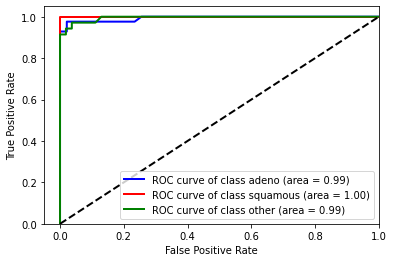

In [ ]:
y_score = cross_val_predict(rf, data_new_20features_X, data_y_trans, cv=10 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
list_class = ['adeno','squamous', 'other' ]
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(list_class[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

svm

In [ ]:
from sklearn.svm import SVC

svm_rbf = SVC(gamma=4, C=1, probability=True)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(svm_rbf, data_new_20features_X, data_y_trans, cv=10)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [ ]:
print("Classification Report for SVM: \n", classification_report(data_y_trans,y_pred))

Classification Report for SVM: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       1.00      1.00      1.00        12
           2       0.89      0.91      0.90        35

    accuracy                           0.92        89
   macro avg       0.94      0.94      0.94        89
weighted avg       0.92      0.92      0.92        89



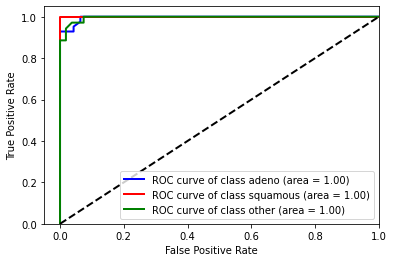

In [ ]:
y_score = cross_val_predict(svm_rbf, data_new_20features_X, data_y_trans, cv=10 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
list_class = ['adeno','squamous', 'other' ]
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(list_class[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()



knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3) 

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(knn, data_new_20features_X, data_y_trans, cv=10)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [ ]:
print("Classification Report for KNN: \n", classification_report(data_y_trans,y_pred))

Classification Report for KNN: 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        42
           1       0.47      0.67      0.55        12
           2       0.88      0.66      0.75        35

    accuracy                           0.76        89
   macro avg       0.72      0.73      0.72        89
weighted avg       0.79      0.76      0.77        89



ROC Curve

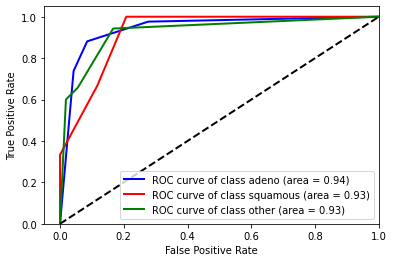

In [ ]:
y_score = cross_val_predict(knn, data_new_20features_X, data_y_trans, cv=10 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
list_class = ['adeno','squamous', 'other' ]
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(list_class[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

Gradient boostclassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gradient_boost = GradientBoostingClassifier(random_state=56)

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(gradient_boost, data_new_20features_X, data_y_trans, cv=10)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [ ]:
print("Classification Report for Gradient boost: \n", classification_report(data_y_trans,y_pred))

Classification Report for Gradient boost: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       1.00      1.00      1.00        12
           2       0.94      0.94      0.94        35

    accuracy                           0.96        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.96      0.96      0.96        89



ROC

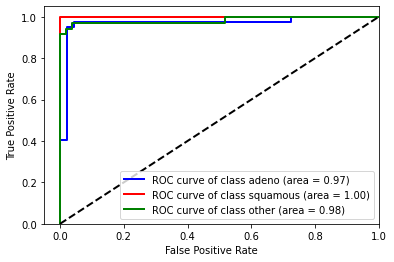

In [ ]:
y_score = cross_val_predict(gradient_boost, data_new_20features_X, data_y_trans, cv=10 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
list_class = ['adeno','squamous', 'other' ]
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(list_class[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()